In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import importlib
import data_cleaning
from data_cleaning import df_from_movie_csv, TABLE_FORMATS
%matplotlib inline

In [2]:
dfs = {}
for table_name in TABLE_FORMATS.keys():
    dfs[table_name] = df_from_movie_csv(table_name)

In [3]:
imdb_title_ratings = dfs['imdb.title.basics'].join(dfs['imdb.title.ratings'])

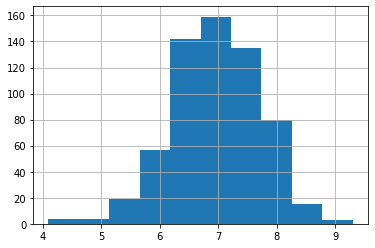

In [4]:
imdb_title_ratings[(imdb_title_ratings.numvotes > 100000)]['averagerating'].hist()

In [15]:
from split_data_fields import expand_df_split_fields
title_genres = expand_df_split_fields(dfs['imdb.title.basics'],'imdb.title.basics')

In [16]:
title_genre_ratings = title_genres.join(dfs['imdb.title.ratings'])

In [21]:
title_genre_ratings[(title_genre_ratings.numvotes > 100000) & (title_genre_ratings.genre == 'Action')] \
                   .averagerating.hist(by=title_genre_ratings['genre'])

ValueError: cannot reindex from a duplicate axis

This actually sort of appears to work:

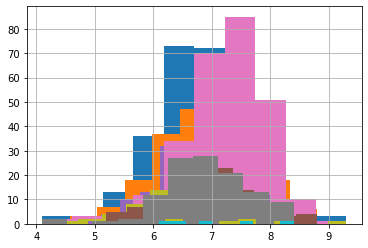

In [26]:
title_genre_ratings[title_genre_ratings.numvotes > 100000].groupby('genre').averagerating.hist();